In [36]:
import sympy as sym

def merge(list1, list2) -> list[tuple]:
    """
    Объединяет два списка в список попарных кортежей
    [a, b], [c, d] -> [(a, c), (b, d)]
    """
    return list(zip(list1, list2))

variables = x1, x2 = sym.symbols('x1, x2')
coeffs = a, b, c, d = sym.symbols('a, b, c, d')

f = a*(x1 - b)**2 + c*(x2 - d)**2

values_of_coeffs = [[ 2, 6, 3, 6 ], [ 3, -4, 1, -6 ], [ 1, -7, 2, 8 ]]

funcs = [f.subs( merge(coeffs, value) ) for value in values_of_coeffs]

# кол-во функций
N = len(funcs) 

display(*funcs)

2*(x1 - 6)**2 + 3*(x2 - 6)**2

3*(x1 + 4)**2 + (x2 + 6)**2

(x1 + 7)**2 + 2*(x2 - 8)**2

In [38]:
alphas = sym.symbols(' '.join([f'alpha{i+1}' for i in range(N)]))

f0 = sum([alphas[i] * funcs[i] for i in range(N)])
f0

alpha1*(2*(x1 - 6)**2 + 3*(x2 - 6)**2) + alpha2*(3*(x1 + 4)**2 + (x2 + 6)**2) + alpha3*((x1 + 7)**2 + 2*(x2 - 8)**2)

In [51]:
import numpy as np
def generate_points():
    ls = []
    for i in range(10):
        for j in range(10 - i):
            ls.append([i / 10, j / 10, (10 - i - j) / 10])
    return np.array(ls)

num_alphas = generate_points()

num_alphas[:5]

array([[0. , 0. , 1. ],
       [0. , 0.1, 0.9],
       [0. , 0.2, 0.8],
       [0. , 0.3, 0.7],
       [0. , 0.4, 0.6]])

In [57]:
# наискорейший спуск
import sympy as sym
import numpy as np

norm = np.linalg.norm

def get_alfa_from_x_and_gradient(variables, f):
    N = len(variables)

    a = sym.symbols('a')

    # составляем переменные s_i для каждого x_i
    s_variables = sym.symbols(' '.join( [f's{i}' for i in range(1, N + 1)] ) )

    # [(x_i, a*s_i + x_i)] - лист кортежей с заменой
    replacement = [(variables[i], variables[i] + a * s_variables[i]) for i in range(N)]

    # градиент функции по всем переменным
    gradients_f = [sym.diff(f, variable) for variable in variables]

    # заменяем переменные в градиенте
    gradients_f = [f.subs(replacement) for f in gradients_f]

    # домножаем градиент по каждой переменной на s_i
    expr = sum([gradients_f[i] * s_variables[i] for i in range(N)])
    
    # выражаем a
    solution = sym.solve(expr, a)[0]

    return sym.lambdify(variables + s_variables, solution)

def get_func_gradient_from_point(variables, f, x0):
    # градиент функции по всем переменным
    gradients_f = [sym.diff(f, variable) for variable in variables]

    # превращение из символьного представления в функцию
    lambd_gradients_f = [
        sym.lambdify(variables, gradient_f) for gradient_f in gradients_f]
    
    grad_f_x = np.array([f(*x0) for f in lambd_gradients_f])

    return np.where(np.abs(grad_f_x) > 0.0001, grad_f_x, 0)

def steepest_descent(
    variables: list[sym.Symbol],
    f: sym.Add,
    x0: np.ndarray,
    eps: float
):
    x1 = x0

    alfa = get_alfa_from_x_and_gradient(variables, f)

    for _ in range(1000):
        grad_f_x = get_func_gradient_from_point(variables, f, x1)
        
        alfa_ = alfa(*x1, *-grad_f_x)

        x1 = x0 + alfa_ * -grad_f_x

        if norm(x1 - x0) < eps:
            return x1
        x0 = x1

In [60]:
points = []
for i in range(len(num_alphas)):
    func = f0.subs(merge(alphas,num_alphas[i]))
    min_x = steepest_descent(variables, func, x0=np.array([1.5, 1.5]), eps=1e-2)
    points.append(min_x)
points = np.array(points)

'[0. 0. 1.]'

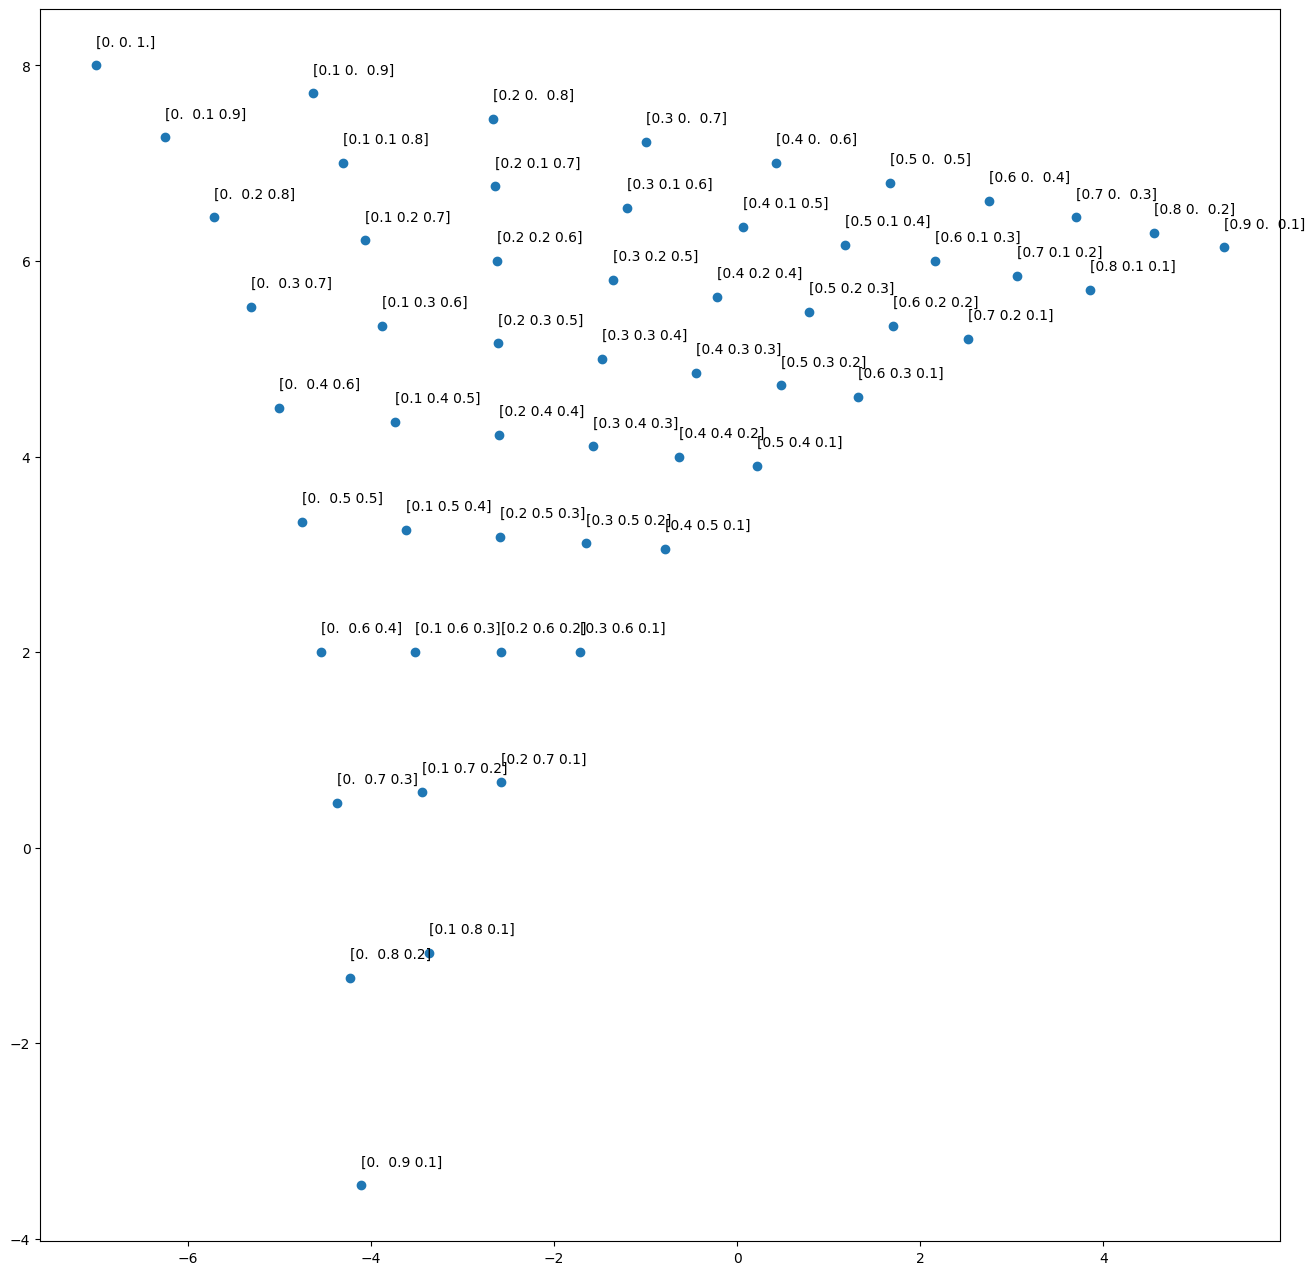

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))

plt.scatter(points[:, 0], points[:, 1])

for i in range(len(points)):
    plt.annotate(num_alphas[i], (points[i, 0], points[i, 1] + 0.2))
